In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
league_19 = pd.read_csv("data/season-1819_csv.csv")
league_18 = pd.read_csv("data/season-1718_csv.csv")
league_17 = pd.read_csv("data/season-1617_csv.csv")
league_16 = pd.read_csv("data/season-1516_csv.csv")
league_15 = pd.read_csv("data/season-1415_csv.csv")
league_14 = pd.read_csv("data/season-1314_csv.csv")
league_13 = pd.read_csv("data/season-1213_csv.csv")
league_12 = pd.read_csv("data/season-1112_csv.csv")
league_11 = pd.read_csv("data/season-1011_csv.csv")
league_10 = pd.read_csv("data/season-0910_csv.csv")

In [3]:
leagues = [league_10, league_11, league_12, league_13, league_14, league_15, league_16, 
           league_17, league_18, league_19]

In [4]:
for i in range(len(leagues)):
    leagues[i]["Month"] = pd.DatetimeIndex(leagues[i].Date).month
    leagues[i]["Season"] = np.repeat(2010+i, len(leagues[i]))

In [5]:
full = league_10
for league in leagues[1:]:
    full = full.append(league)

In [6]:
monthly_goals = full[["Month", "Season", "FTHG", "FTAG"]].groupby(["Season", "Month"]).sum()
monthly_goals["Goals"] = monthly_goals["FTHG"] + monthly_goals["FTAG"]
monthly_goals.drop(columns=["FTHG", "FTAG"], inplace=True)
monthly_goals = monthly_goals.reset_index()

In [7]:
month_means = monthly_goals[["Month", "Goals"]].groupby("Month").mean()
may_mean = month_means.iloc[4]
monthly_goals.loc[99] = [2019, 5, int(may_mean.values[0])]

In [8]:
goals_pivot = monthly_goals.pivot("Season", "Month", "Goals")

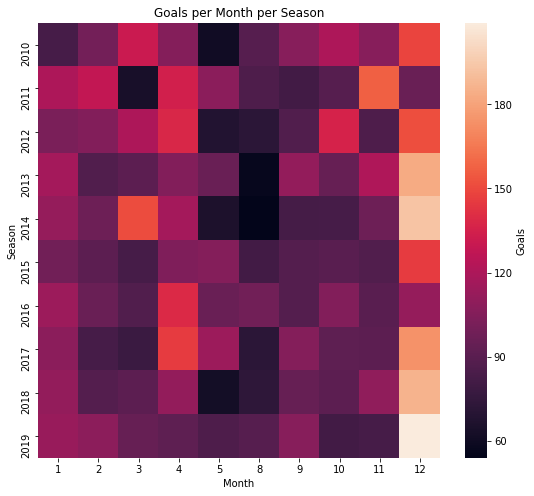

In [9]:
plt.figure(figsize=(9,8))
sns.heatmap(goals_pivot, cbar_kws={"label": "Goals"})
plt.title("Goals per Month per Season")
plt.show()

Most goals happen across all seasons are scored around December. This could be because there is also a spike in number of games around this time of year. And it seems that August has the least amount of goals usually across seasons. The new season begins in August, so maybe this is the result of teams trying to settle into the new season.